Loading and preprocessing

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the species column
df['species'] = iris.target

# Drop the species column
df = df.drop(columns=['species'])

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


A) KMeans Clustering

KMeans clustering is an unsupervised machine learning algorithm that partitions the dataset into k clusters, where each data point belongs to the cluster with the nearest mean. The algorithm works iteratively to assign each data point to one of k clusters based on the features that are provided. 

The steps are as follows:

1. Initialize k centroids randomly.

2. Assign each data point to the nearest centroid.

3. Recalculate the centroids as the mean of all data points assigned to that centroid.

4. Repeat steps 2 and 3 until the centroids no longer change significantly.

Why KMeans might be suitable for the Iris Dataset:
The Iris dataset contains 4 features (sepal length, sepal width, petal length, petal width) that can be used to group the data into clusters. KMeans is suitable because it can efficiently partition the data into clusters based on these features, and the number of clusters (k=3) is known beforehand (since there are 3 species of Iris flowers).


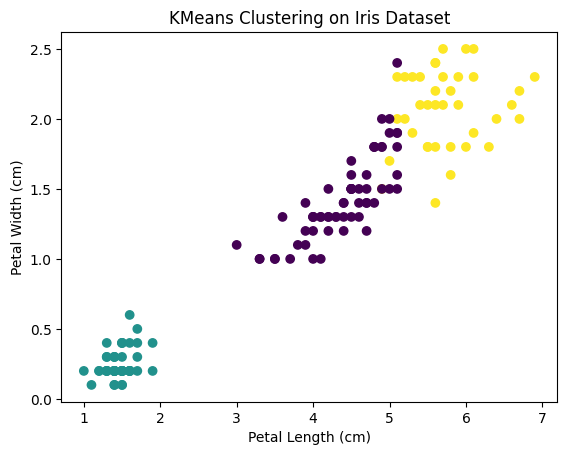

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Apply KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  
df['cluster'] = kmeans.fit_predict(df)

# Visualize the clusters
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['cluster'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('KMeans Clustering on Iris Dataset')
plt.show()


B) Hierarchical Clustering

Hierarchical clustering is another unsupervised learning algorithm that builds a hierarchy of clusters. It can be done in two ways:

Agglomerative (Bottom-Up): Each data point starts as its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

Divisive (Top-Down): All data points start in one cluster, and splits are performed recursively as one moves down the hierarchy.

Why Hierarchical Clustering might be suitable for the Iris Dataset:
Hierarchical clustering is suitable for the Iris dataset because it provides a dendrogram that can help visualize the relationships between different clusters. It also does not require the number of clusters to be specified beforehand, which can be useful if the number of clusters is unknown.

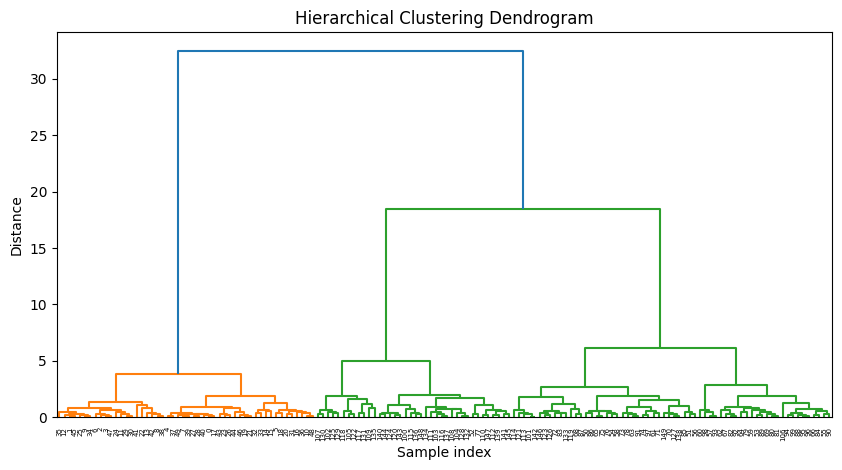

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering 
Z = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()